In [1]:
import pandas as pd

df = pd.read_csv("/mnt/hdd/PANO.arlen/results/2023-07-17-014851/result.csv")

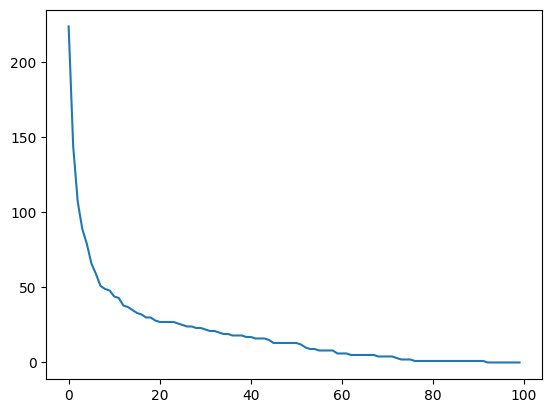

20.31


In [9]:
find_filling = df["finding"] == "CARIES"
filling_list = []

for i in range(1, 101):
    filling_list.append(sum((df[find_filling]["score"]>0.01*i)*1))

import matplotlib.pyplot as plt
plt.plot(filling_list)
plt.show()

print(sum(filling_list)/100)

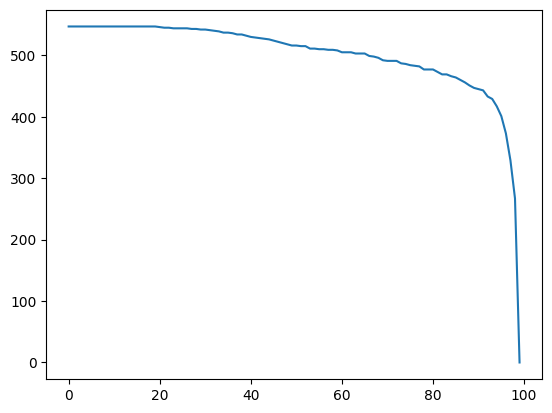

501.33


In [8]:
find_miss = df["finding"]=="MISSING"

missing_list = []

for i in range(1, 101):
    missing_list.append(sum((df[find_miss]["score"]>0.01*i)*1))

import matplotlib.pyplot as plt
plt.plot(missing_list)
plt.show()

print(sum(missing_list)/100)

In [159]:
import json
import pandas as pd
from typing import Any
import re

row_results: list[dict[str, Any]] = []
ntuh_sheet = pd.read_csv("/mnt/hdd/PANO.arlen/google_sheet/NTUH_sheet.csv")

with open('/mnt/hdd/PANO/data/coco/instance-detection-v1-ntuh.json') as json_file:
    data = json.load(json_file)

    images = data["images"]
    finding = data["categories"]

images_id = [item["id"] for item in images]
images_name = [item["file_name"].split("/")[1].split(".")[0] for item in images]
lookup_file = dict(zip(images_id, images_name))

finding_id = [item["id"] for item in finding]
finding_name = [item["name"] for item in finding]
lookup_finding = dict(zip(finding_name, finding_id))

def translate_file(ntuh_sheet_no):
    if ntuh_sheet_no in lookup_file:
        return lookup_file[ntuh_sheet_no]
    else:
        print("no tooth")
        return None
    
def us_fdi(x: int):
    grid = (x-1)//8+1
    if grid%2 == 0:
        index = (x-1)%8 + 1
    else:
        index = 9 - ((x-1)%8 + 1)
    
    fdi = grid*10+index
    return fdi

for i, id in enumerate(ntuh_sheet["No."]):
    file_name = translate_file(id)

    list_finding = ["Missing", "Implant", "Remnant Root", "Caries", "Root Filled", "Crown Bridge", "Apical Lesion", "Restoration"]
    for f in list_finding:
        cell_value = ntuh_sheet[f][i]
        if isinstance(cell_value, str) and not pd.isna(cell_value):
            matches = re.findall(r'\[(\d+)\]', ntuh_sheet[f][i])
            tooth_us = [int(num) for num in matches]
            for j in tooth_us:
                fdi = us_fdi(j)

                row_results.append(
                    {
                        "file_name": file_name,
                        "fdi": fdi,
                        "finding": f
                    }
                )
        else:
            # 處理 NaN 或其他非字串型別的情況
            print("Skipping row due to NaN or non-string value:", cell_value)

no tooth
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping row due to NaN or non-string value: nan
Skipping ro

In [160]:
df_result: pd.DataFrame = pd.DataFrame(row_results)
df_result.to_csv("ntuh.csv", index=False)

In [7]:
import json
import pandas as pd
import re

row_results = []
ntuh_sheet = pd.read_csv("/mnt/hdd/PANO.arlen/google_sheet/NTUH_sheet.csv")

with open('/mnt/hdd/PANO/data/coco/instance-detection-v1-ntuh.json') as json_file:
    data = json.load(json_file)

images = data["images"]
finding = data["categories"]

# 建立字典以便尋找對應檔案名稱和對應發現ID
lookup_file = {item["id"]: item["file_name"].split("/")[1].split(".")[0] for item in images}
lookup_finding = {item["name"]: item["id"] for item in finding}

def translate_file(ntuh_sheet_no):
    return lookup_file.get(ntuh_sheet_no, None)

def us_fdi(x: int):
    grid = (x-1) // 8 + 1
    index = (x-1) % 8 + 1 if grid % 2 == 0 else 9 - ((x-1) % 8 + 1)
    fdi = grid * 10 + index
    return fdi

list_finding = ["Missing", "Implant", "Remnant Root", "Caries", "Root Filled", "Crown Bridge", "Apical Lesion", "Restoration"]
list_finding_PANO = ["MISSING", "IMPLANT", "ROOT_REMNANTS", "CARIES", "ENDO", "CROWN_BRIDGE", "PERIAPICAL_RADIOLUCENT", "FILLING"]

dict_finding = dict(zip(list_finding, list_finding_PANO))

for i, id in enumerate(ntuh_sheet["No."]):
    print(id)
    file_name = translate_file(id)
    if file_name is None:
        print("No tooth")
        continue

    for f in list_finding:
        cell_value = ntuh_sheet[f][i]
        if isinstance(cell_value, str) and not pd.isna(cell_value):
            matches = re.findall(r'\[(\d+)\]', cell_value)
            tooth_us = [int(num) for num in matches]
            print(tooth_us)
            for j in tooth_us:
                fdi = us_fdi(j)
                row_results.append(
                    {
                        "file_name": file_name,
                        "fid": fdi,
                        "finding": dict_finding[f]
                    }
                )

    if i == 0:
        break


df_result: pd.DataFrame = pd.DataFrame(row_results)
df_result.to_csv("ntuh_gloden.csv", index=False)

907
No tooth
912
[1]
[15]
[7, 26]
913
[1, 16, 17, 19, 32]
[3, 9, 18, 20, 31]
[3, 18, 20, 31]
[2, 9, 30]
914
[3, 5, 8, 10, 12, 32]
[18, 19, 28]
[1, 13, 14, 20, 21, 25, 29, 31]
[2, 4, 6, 7, 9, 11, 13, 14, 15, 20, 21, 25, 29]
[15, 16, 17, 31]
[1, 16, 17, 25, 29, 30, 31]
915
[1, 3, 7, 14, 16, 17, 31, 32]
[18]
[8, 9, 12, 13, 15, 29]
[6, 8, 9, 12, 13, 15, 19, 28, 29]
[10, 11]
916
[1, 14, 16, 17, 32]
[9, 15]
[13, 15]
[8, 9, 10, 11, 19, 30, 31]
917
[1, 4, 9, 16, 17, 19, 32]
[3, 6, 12, 13, 14, 21, 24, 25, 29, 30]
[3, 5, 12, 13, 14, 20, 21, 29, 30]
[6, 10, 11, 23]
918
[14, 17, 32]
[3, 12, 31]
[18]
[2, 19]
[2, 3, 12, 19, 31]
[4, 5, 15, 18, 29, 30]
919
[1, 16, 17, 32]
[2]
[7, 8, 9, 10, 29, 30, 31]
[2, 7, 8, 9, 10, 29, 30, 31]
[3, 6, 15, 18, 19, 20, 21]
920
[1, 2, 3, 4, 14, 15, 16, 17, 32]
[6]
[5, 20, 25]
[5]
[20]
[6, 7, 9, 20, 21, 22, 23, 25, 30, 31]
921
[1, 2, 7, 8, 15, 16, 18, 30, 32]
[28]
[19, 27]
[4, 6, 10, 12, 27, 31]
[4, 5, 6, 9, 10, 11, 12, 20, 23, 24, 25, 26, 28, 29, 31]
[11]
[3, 14, 17]
9

In [1]:
for i in range(0):
    print(i)

In [17]:
import pandas as pd

data = {'ID': [1, 2, 3, 4],
        'x': [0, 0, 1, 1],
        'y': [0, 1, 0, 1],
        'Age': [25, 30, 22, 28]}

df = pd.DataFrame(data)

df.set_index(['x','y'], inplace=True)

print(df)

     ID  Age
x y         
0 0   1   25
  1   2   30
1 0   3   22
  1   4   28


In [22]:
df.loc[1,1]["ID"]

4